In [1]:
import re, os, sys, json, time, requests
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
# TODO load config.json, load eval.parquet
fs = sorted(Path('../outputs').glob('**/eval.parquet'))
fs

[PosixPath('../outputs/math-SmolLM-135M-Instruct/HuggingFaceTB-SmolLM-135M-Instruct_hs-None-InnerDPO_math/2025-06-05_06-00-25/eval.parquet'),
 PosixPath('../outputs/math-SmolLM2-135M-sft/wassname-SmolLM2-135M-sft_hs-None-InnerDPO_math/2025-06-05_12-17-01/eval.parquet'),
 PosixPath('../outputs/math-llama-3.1-tiny-random/yujiepan-llama-31-tiny-random_hs-None-InnerDPO_math/2025-06-05_05-45-38/eval.parquet'),
 PosixPath('../outputs/prefvecexp-250605_0622-math-Llama-3-Base-8B-SFT/princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math/2025-06-05_06-22-09/eval.parquet'),
 PosixPath('../outputs/prefvecexp-250605_0849-math-Llama-3-Base-8B-SFT/princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math/2025-06-05_08-49-12/eval.parquet'),
 PosixPath('../outputs/prefvecexp-250605_1235-math-Llama-3-Base-8B-SFT/princeton-nlp-Llama-3-Base-8B-SFT_dpo_math/2025-06-05_12-51-46/eval.parquet'),
 PosixPath('../outputs/prefvecexp-250605_1235-math-Llama-3-Base-8B-SFT/princeton-nlp-Llama-3-Base-8B-SFT_dpo_math/2

In [3]:
def load_config_df(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    config.update(config.pop('post'))
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    return config_df


df = pd.concat([load_config_df(f) for f in fs])
df.columns

# load_config(fs[0])

HuggingFaceTB-SmolLM-135M-Instruct_hs-None-InnerDPO_math
wassname-SmolLM2-135M-sft_hs-None-InnerDPO_math
yujiepan-llama-31-tiny-random_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_dpo_math
princeton-nlp-Llama-3-Base-8B-SFT_dpo_math
princeton-nlp-Llama-3-Base-8B-SFT_dpo_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-ETHER-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-ETHER-MSE_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-ETHER-Rank_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerD

Index(['lr', 'weight_decay', 'dataset', 'verbose', 'seed', 'dev',
       'load_in_4bit', 'load_in_8bit', 'use_gradient_checkpointing',
       'schedule', 'n_samples', 'eval_samples', 'max_length',
       'max_prompt_length', 'base_model', 'batch_size', 'save', 'wandb',
       'collection_layers', 'collect_input', 'collect_hs', 'dpo_agg_type',
       'group_name', 'adapter_name', 'human_name', 'model_fname',
       'ds_name_train', 'run_fname', 'save_dir', 'ts', 'file', 'method',
       'use_policy_weights'],
      dtype='object')

In [4]:
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config['file'] = f
    config['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config['method'] = method

    return config


# df = pd.concat([load_config(f) for f in fs])
# df.columns

load_config(fs[0])

HuggingFaceTB-SmolLM-135M-Instruct_hs-None-InnerDPO_math


{'lr': 7e-05,
 'weight_decay': 0.0001,
 'dataset': 'math',
 'verbose': 2,
 'seed': 42,
 'dev': False,
 'load_in_4bit': True,
 'load_in_8bit': False,
 'use_gradient_checkpointing': False,
 'schedule': 'wsd',
 'n_samples': 230,
 'eval_samples': 32,
 'max_length': 512,
 'max_prompt_length': 450,
 'base_model': 'HuggingFaceTB/SmolLM-135M-Instruct',
 'batch_size': 2,
 'save': True,
 'wandb': False,
 'collection_layers': 'range(.3,-1)',
 'collection_keys_in': ['.*o_proj$', '.*out_proj$', '.*down_proj$'],
 'collection_keys_out': ['.*q_proj$',
  '.*k_proj$',
  '.*v_proj$',
  '.*qkv_proj$',
  '.*gate_proj$',
  '.*up_proj$'],
 'collect_input': True,
 'collect_hs': True,
 'loss': {'α': 1.0,
  'eps': 1e-05,
  'β': 1.0,
  'use_policy_weights': True,
  'align_method': 'direct_projection',
  'norm_before_reduce': True},
 'transform': {},
 'dpo_agg_type': 'ipo',
 'post': {'group_name': 'math-SmolLM-135M-Instruct',
  'adapter_name': 'hs-None-InnerDPO',
  'human_name': 'ReprPO_None_InnerDPO innerdpo.ali

In [5]:
# TODO add seed, train, other parts from config
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    df = pd.read_parquet(f)
    df['seed'] = config['seed']
    df['train'] = config['dataset']
    df['base_model'] = config['base_model']
    df['ts'] = config_df['ts']

    return df

df_res2 = pd.concat([load_config(f) for f in fs])
df_res2.columns

HuggingFaceTB-SmolLM-135M-Instruct_hs-None-InnerDPO_math
wassname-SmolLM2-135M-sft_hs-None-InnerDPO_math
yujiepan-llama-31-tiny-random_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_dpo_math
princeton-nlp-Llama-3-Base-8B-SFT_dpo_math
princeton-nlp-Llama-3-Base-8B-SFT_dpo_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-ETHER-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-ETHER-MSE_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-ETHER-Rank_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerDPO_math
princeton-nlp-Llama-3-Base-8B-SFT_hs-None-InnerD

Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts'],
      dtype='object')

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [7]:
from reprpo.data.util import sort_str, nice_ds_name

df_res2.columns

Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts'],
      dtype='object')

In [8]:
from reprpo.data.util import df_sort_cols

In [17]:
df_res2.columns

Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts'],
      dtype='object')

('HuggingFaceTB/SmolLM-135M-Instruct', 'math')


ds_name_nice,cross_domain (change_my_view_test ),cross_domain (cooking_test ),cross_domain (math_fiction_test ),in_domain (math_test ),moral_transfer (ethics_commonsense_test ),moral_transfer (ethics_deontology_test ),moral_transfer (ethics_justice_test ),moral_transfer (ethics_utilitarianism_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,,,,
hs-None-InnerDPO,0.594±nan,0.719±nan,0.906±nan,0.531±nan,0.469±nan,0.656±nan,0.594±nan,0.406±nan,0.500±nan
none,0.594±nan,0.719±nan,0.875±nan,0.625±nan,0.500±nan,0.688±nan,0.531±nan,0.406±nan,0.500±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.625±nan,0.729±nan,0.531±nan,0.500±nan
hs-None-InnerDPO,0.531±nan,0.740±nan,0.531±nan,0.500±nan


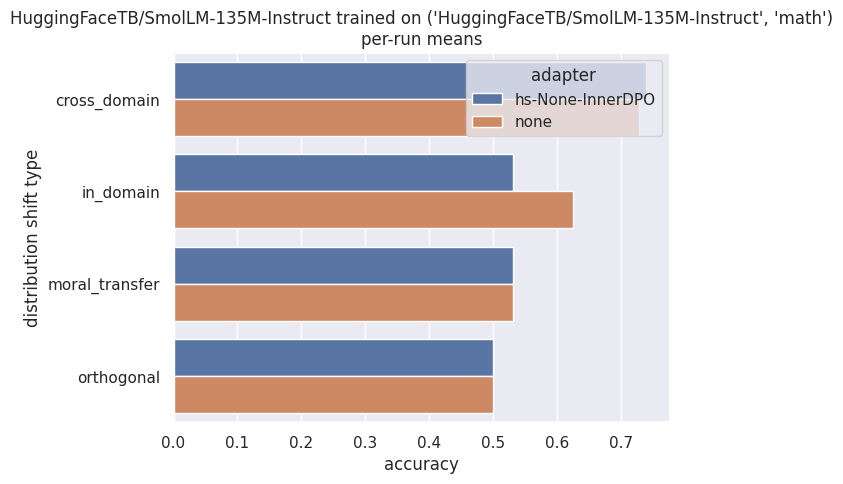

('princeton-nlp/Llama-3-Base-8B-SFT', 'math')


ds_name_nice,cross_domain (change_my_view),cross_domain (change_my_view_test ),cross_domain (cooking),cross_domain (math_fiction),cross_domain (math_fiction_test ),in_domain (math),in_domain (math_test ),moral_transfer (ethics_commonsense),moral_transfer (ethics_deontology),moral_transfer (ethics_justice),moral_transfer (ethics_justice_test ),moral_transfer (ethics_utilitarianism),moral_transfer (ethics_utilitarianism_test ),orthogonal (medical_dpo_v2_test),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,,,,,,,,,,
none,0.488±nan,0.587±nan,0.840±nan,0.568±nan,0.576±nan,0.883±nan,0.880±nan,0.503±nan,0.507±nan,0.227±nan,0.207±nan,0.395±nan,0.393±nan,0.428±nan,0.457±nan
hs-None-InnerDPO,0.534±nan,0.634±nan,0.873±nan,0.818±nan,0.880±nan,0.913±nan,0.925±nan,0.496±nan,0.472±nan,0.181±nan,0.214±nan,0.374±nan,0.383±nan,0.391±nan,0.451±nan
dpo,nan±nan,0.611±nan,nan±nan,nan±nan,0.848±nan,nan±nan,0.890±nan,nan±nan,nan±nan,nan±nan,0.292±nan,nan±nan,0.432±nan,nan±nan,0.543±nan
hs-ETHER-InnerDPO,nan±nan,0.600±nan,nan±nan,nan±nan,0.908±nan,nan±nan,0.924±nan,nan±nan,nan±nan,nan±nan,0.166±nan,nan±nan,0.340±nan,nan±nan,0.398±nan
hs-ETHER-MSE,nan±nan,0.592±nan,nan±nan,nan±nan,0.574±nan,nan±nan,0.872±nan,nan±nan,nan±nan,nan±nan,0.204±nan,nan±nan,0.384±nan,nan±nan,0.456±nan
hs-ETHER-Rank,nan±nan,0.584±nan,nan±nan,nan±nan,0.626±nan,nan±nan,0.902±nan,nan±nan,nan±nan,nan±nan,0.204±nan,nan±nan,0.392±nan,nan±nan,0.442±nan
side-None-InnerDPO,nan±nan,0.608±nan,nan±nan,nan±nan,0.888±nan,nan±nan,0.948±nan,nan±nan,nan±nan,nan±nan,0.204±nan,nan±nan,0.344±nan,nan±nan,0.448±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.881±nan,0.599±nan,0.351±nan,0.443±nan
dpo,0.890±nan,0.761±nan,0.362±nan,0.543±nan
hs-ETHER-InnerDPO,0.924±nan,0.805±nan,0.253±nan,0.398±nan
hs-ETHER-MSE,0.872±nan,0.580±nan,0.294±nan,0.456±nan
hs-ETHER-Rank,0.902±nan,0.612±nan,0.298±nan,0.442±nan
hs-None-InnerDPO,0.922±nan,0.797±nan,0.348±nan,0.417±nan
side-None-InnerDPO,0.948±nan,0.795±nan,0.274±nan,0.448±nan


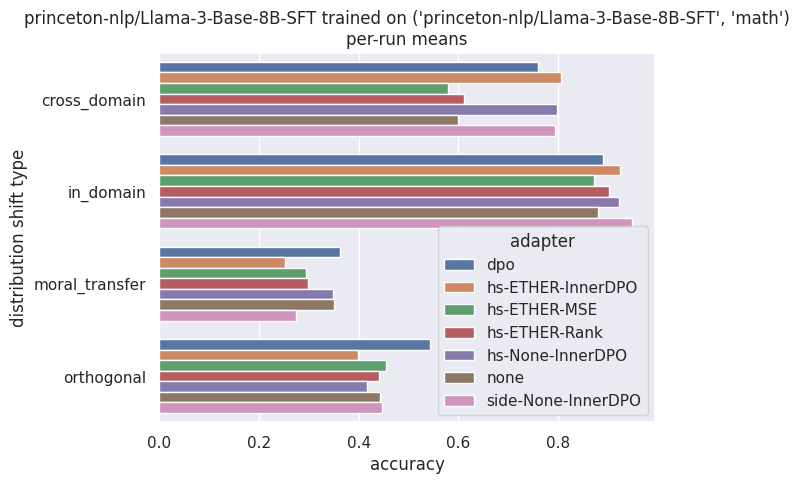

('wassname/SmolLM2-135M-sft', 'math')


ds_name_nice,cross_domain (change_my_view_test ),cross_domain (math_fiction_test ),in_domain (math_test ),moral_transfer (ethics_justice_test ),moral_transfer (ethics_utilitarianism_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,
none,0.625±nan,0.438±nan,0.594±nan,0.156±nan,0.375±nan,0.438±nan
hs-None-InnerDPO,0.656±nan,0.438±nan,0.594±nan,0.188±nan,0.375±nan,0.438±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.594±nan,0.531±nan,0.266±nan,0.438±nan
hs-None-InnerDPO,0.594±nan,0.547±nan,0.281±nan,0.438±nan


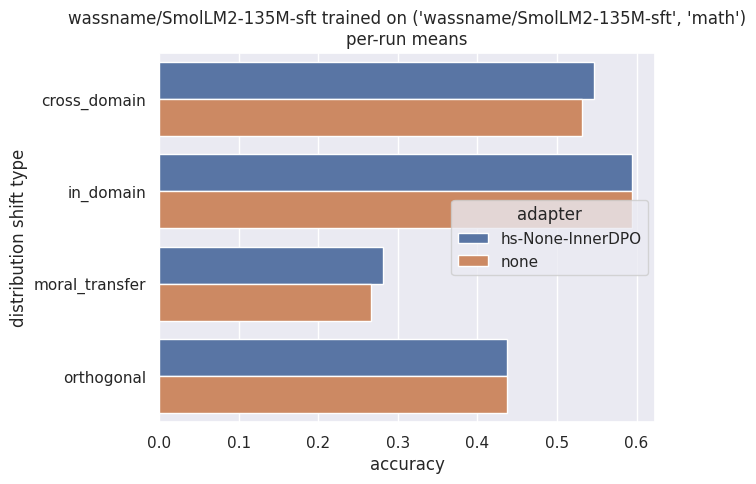

('yujiepan/llama-3.1-tiny-random', 'math')


ds_name_nice,cross_domain (change_my_view_test ),cross_domain (cooking_test ),cross_domain (math_fiction_test ),in_domain (math_test ),moral_transfer (ethics_commonsense_test ),moral_transfer (ethics_deontology_test ),moral_transfer (ethics_justice_test ),moral_transfer (ethics_utilitarianism_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,,,,
hs-None-InnerDPO,0.125±nan,0.438±nan,0.531±nan,0.250±nan,0.344±nan,0.219±nan,0.438±nan,0.375±nan,0.219±nan
none,0.125±nan,0.438±nan,0.531±nan,0.250±nan,0.344±nan,0.219±nan,0.438±nan,0.375±nan,0.219±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
none,0.250±nan,0.365±nan,0.344±nan,0.219±nan
hs-None-InnerDPO,0.250±nan,0.365±nan,0.344±nan,0.219±nan


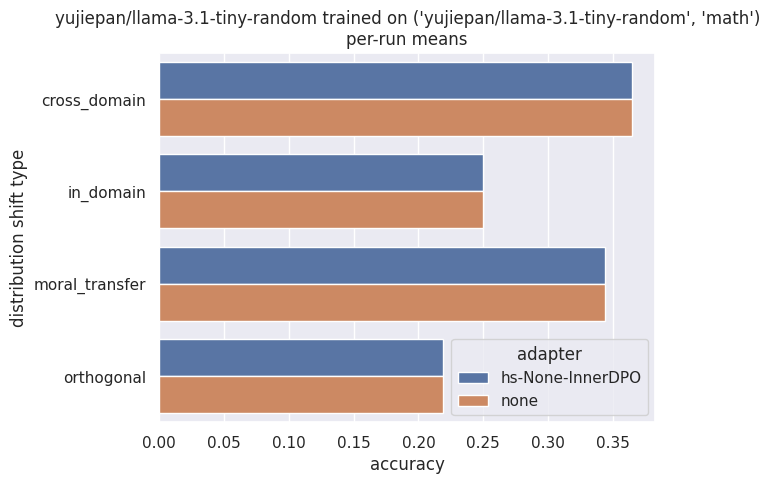

In [19]:
for train_set, group in df_res2.groupby(['base_model', "train"]):
    print(train_set)
    # per-run means for each seed, dataset, adapter
    run_stats = group.groupby(["seed", "ds_name_nice", "adapter"])['correct'].mean().reset_index()
    stats = run_stats.groupby(["ds_name_nice", "adapter"])['correct'].agg(['mean','std']).reset_index()
    mean_df = stats.pivot(index='adapter', columns='ds_name_nice', values='mean')
    std_df = stats.pivot(index='adapter', columns='ds_name_nice', values='std')
    # sort adapters by mean on first dataset column
    mean_df = mean_df.sort_values(by=mean_df.columns[0], axis=0)

    mean_df = df_sort_cols(mean_df, first=['base','none'])
    # mean_df = df_sort_cols(mean_df.T, 

    # mean_df.index = sort_str(mean_df.index.tolist(), first=['base','none'])
    mean_df.index.name = 'adapter/ds'
    # combine mean and std into strings
    df_res_ds = mean_df.copy()
    for col in mean_df.columns:
        df_res_ds[col] = mean_df[col].combine(std_df[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_ds)

    # per-run means for distribution shift types
    run_stats2 = group.groupby(["seed", "type", "adapter"])['correct'].mean().reset_index()
    stats2 = run_stats2.groupby(["type", "adapter"])['correct'].agg(['mean','std']).reset_index()
    mean2 = stats2.pivot(index='adapter', columns='type', values='mean')
    std2 = stats2.pivot(index='adapter', columns='type', values='std')

    # reorder columns and adapters FIXME
    mean2 = df_sort_cols(mean2, first=['in_domain'], last=['orthogonal'])
    mean2 = df_sort_cols(mean2.T, first=['base','none']).T
    # mean2.columns = sort_str(mean2.columns.tolist(), first=['in_domain'], last=['orthogonal'])
    # mean2.index = sort_str(mean2.index.tolist(), first=['base','none'])
    mean2.index.name = 'adapter / distribution_shift'
    # combine mean and std into strings
    df_res_type = mean2.copy()
    for col in mean2.columns:
        df_res_type[col] = mean2[col].combine(std2[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_type)

    # bar chart
    base_model = group['base_model'].iloc[0]
    sns.barplot(data=run_stats2, y='type', x='correct', hue='adapter', errorbar='sd', orient='h', legend='full')
    plt.title(f"{base_model} trained on {train_set}\nper-run means")
    plt.ylabel('distribution shift type')
    plt.xlabel('accuracy')
    plt.show() 

    # TODO maybe show deviation from base by plotting it underneatm and the top has alpha 0.5